# Drug Classification

This notebook will look at data of 200 patients suffereing from the same illness.
 - These patients were prescribed 5 different drugs

Data description:
    - Age           =      Age of patient
    - Sex           =      Sex of patient
    - BP            =      Blood pressure of patient
    - Cholesterol   =      Cholesterol level of patient
    - Na_to_K       =      Sodium - Potassium of patient
    - Drug          =      Drug prescribed to patient

#### Our model will hope to predict what drug will be prescribed to a patients, relative to their features.

*Data from: https://www.kaggle.com/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees*

In [2]:
# General
import pandas as pd

# Ignoring warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data viz
import seaborn as sn
import matplotlib.pyplot as plt

# Decision Tree
from sklearn import tree

# Label Encoding - Converting labels to numbers
from sklearn.preprocessing import LabelEncoder

# Confusion matrix
from sklearn.metrics import confusion_matrix

# Spilitting data; train & test
from sklearn.model_selection import train_test_split

In [3]:
# Import data
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. ML Practice Projects\Drug Classification\drug200.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
# Let's see what our data looks like
print(f"The shape of the data is: {df.shape[0]} rows and {df.shape[1]} columns.")
print("-----------------------------------------")
print(f"The different drugs are: {df.Drug.unique()}")
print("-----------------------------------------")
print(f"The features of our model are the: {list(df.columns)[:-1]} columns.")
print("-----------------------------------------")
print(f"The target of our model is the: {list(df.columns)[-1]} column.")

The shape of the data is: 200 rows and 6 columns.
-----------------------------------------
The different drugs are: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
-----------------------------------------
The features of our model are the: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'] columns.
-----------------------------------------
The target of our model is the: Drug column.


In [5]:
# Slitting our data into an input set and target set
inputs = df.drop('Drug', axis='columns')
inputs_ref = inputs.copy() # Creating a reference copy - comparing labels

target = df['Drug']

# We'll have to convert the target data into a dataframe, as otherwise, it's a list 
## Required for processing
target = pd.DataFrame(target)
target_ref = target.copy() # Creating a reference copy - comparing labels

In [6]:
target.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [7]:
inputs.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


### Data Processing

Machine learning models can't understand labels, so we need to convert these labels into numbers.

###### One way to do this is to use the LabelEncoder feature from the SciKit Preprocessing library

In [8]:
# Calling LabelEncoder() function to each column name, we will create new columns at a later point

# Inputs data - encoding
## We can skip the 'Age' and 'Na_to_K' columns as they already contain numerical data
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()

# Target data - encoding
le_drug = LabelEncoder()

In [9]:
# Applying encoded columns to our dataframe

# Input data - applying encoded columns
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])
inputs['bp_n'] = le_bp.fit_transform(inputs['BP'])
inputs['cholesterol_n'] = le_cholesterol.fit_transform(inputs['Cholesterol'])
inputs['na_to_k'] = inputs['Na_to_K'] # Lowercasing the col name and so that we can move it to the end (dropping inital col)

# Target data - applying encoded columns
target['drug_n'] = le_drug.fit_transform(target['Drug'])

In [10]:
# Dropping columns that we won't be using
## Input data
inputs_n = inputs.drop(['Sex', 'BP', 'Cholesterol', 'Na_to_K'], axis = 'columns')
inputs_n.head()

,Age,sex_n,bp_n,cholesterol_n,na_to_k
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [11]:
# Dropping columns that we won't be using
## Input data
target_n = target.drop(['Drug'], axis = 'columns')
target_n.head()

,drug_n
0,4
1,2
2,2
3,3
4,4



### New Data Labels - Encoded vs. Original

Let's write out each label and it's corresponding encoded number.
    - This will help us with referring to what our inputs need to be for our target
    
*For this project I'm doing this manually (comparing reference DF to new DF), however, find a way to get the corresponding encoded numbers automatically*

#### Input data:
- Sex;             
    - F = 0 
    - M = 1
    
- BP;              
    - HIGH = 0
    - LOW = 1    
    - NORMAL = 2
    
- Cholesterol;    
    - HIGH = 0
    - NORMAL = 1
    - LOW = N/A
    
#### Drug data: 
- DrugA = 0
- DrugB = 1
- DrugC = 2
- DrugX = 3
- DrugY = 4


### Creating Decision Tree

In [12]:
# Calling the decision tree model
drug_tree = tree.DecisionTreeClassifier()

In [16]:
# Splitting our data into testing & training sets
input_xtrain, input_xtest, target_ytrain, target_ytest = train_test_split(inputs_n, target_n, test_size=0.2)

In [17]:
# Fitting our model
drug_tree.fit(input_xtrain, target_ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
# Checking our model score
# drug_tree.score(input_xtest, target_ytest)

0.975

#### Model Testing

In [26]:
# Calling columns for reference
list(inputs_n.columns)

['Age', 'sex_n', 'bp_n', 'cholesterol_n', 'na_to_k']

In [27]:
# Test #1
drug_tree.predict([[19, 1, 2, 1, 2.8]])

array([3])

In [28]:
# Test #2
drug_tree.predict([[53, 0, 0, 0, 25]])

array([4])

In [29]:
# Test #3
drug_tree.predict([[28, 1, 1, 1, 15]])

array([4])

#### What can we see from our tests?

##### Test 1:
- Patient characteristics:
    - 19 years old
    - Male
    - Normal BP
    - Normal Cholesterol 
    - 2.8 Na to K 
- Patient will receive Drug 'X'

##### Test 2:
- Patient characteristics:
    - 53 years old
    - Female
    - High BP
    - High Cholesterol 
    - 25 Na to K 
- Patient will receive Drug 'Y'

##### Test 1:
- Patient characteristics:
    - 28 years old
    - Male
    - Low BP
    - Normal Cholesterol 
    - 15 Na to K 
- Patient will receive Drug 'X'


### Confusion Matrix

Let's create a confusion matrix to visualise where our model predicts the true values and when it misses.

In [35]:
# Storing the predicted values to plot against the true values
drug_y_pred = drug_tree.predict(input_xtest)

# Fitting confusion matrix
## CM purpose; plotting the true values (dataset) vs. our predicted values (via model)
drug_cm = confusion_matrix(target_ytest, drug_y_pred)
drug_cm

array([[ 4,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 17]], dtype=int64)

Text(114.0, 0.5, 'True Values')

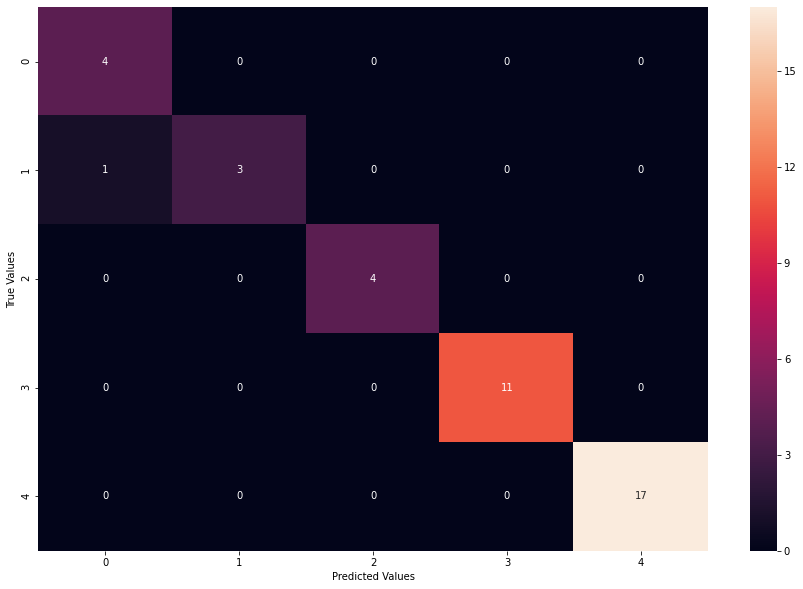

In [36]:
# Visualising the Confusion Matrix

# Setting graph size
plt.figure(figsize=(15,10))

# Plotting Confusion Matrix
sn.heatmap(drug_cm, annot=True)

# Setting graph labels
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

#### What does this confusion matrix show us?

- Our model has very good accuracy, missing only once - where;
    - True value was 'DrugB', but our model predicted; 'DrugA'
- Even though a darker shade suggests our model is missing, in this circumstance there's is just less data for DrugA to DrugC.